# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [1]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [2]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print ("xs:", xs,'\n')
print ("xs indexes:",xs.index,'\n')
# Values of the Series are actually a numpy array
print ("xs values:", xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n')
print (xs[['d', 'f', 'h']], '\n')
print (type(xs[['d', 'f', 'h']]), '\n')

xs: a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

xs indexes: Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

xs values: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 

<class 'pandas.core.series.Series'> 



In [3]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n')
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [4]:
# Series can be created from python dictionary too.
# Not that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)



b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without considering whether the Series involved have the same labels.

In [5]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
print(s)
s = s[1:] + s[:-1]
print(s)

a    1.206387
b    0.662945
c   -0.394313
d   -0.956862
e    0.536868
dtype: float64
a         NaN
b    1.325891
c   -0.788625
d   -1.913724
e         NaN
dtype: float64


### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas has a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [6]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
print(date)

date = dt.datetime(2021,11,22,12,45,10,15)
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 22 2021'
# or alternatively
date = '22/11/2021 12:45:00'
print (date)

days = pd.date_range(date, periods=7, freq='D')
print (days)

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)


2021-12-06
2021-11-22 12:45:10.000015
22/11/2021 12:45:00
DatetimeIndex(['2021-11-22 12:45:00', '2021-11-23 12:45:00',
               '2021-11-24 12:45:00', '2021-11-25 12:45:00',
               '2021-11-26 12:45:00', '2021-11-27 12:45:00',
               '2021-11-28 12:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2021-11-22 12:45:00', '2021-11-22 12:45:01',
               '2021-11-22 12:45:02', '2021-11-22 12:45:03',
               '2021-11-22 12:45:04', '2021-11-22 12:45:05',
               '2021-11-22 12:45:06', '2021-11-22 12:45:07',
               '2021-11-22 12:45:08', '2021-11-22 12:45:09',
               ...
               '2021-11-22 13:44:50', '2021-11-22 13:44:51',
               '2021-11-22 13:44:52', '2021-11-22 13:44:53',
               '2021-11-22 13:44:54', '2021-11-22 13:44:55',
               '2021-11-22 13:44:56', '2021-11-22 13:44:57',
               '2021-11-22 13:44:58', '2021-11-22 13:44:59'],
              dtype='datetime64[ns]', leng

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset.

Timestamp is the pandas equivalent of python’s Datetime and is interchangeable with it in most cases. 

In [7]:
tstamp = pd.Timestamp(dt.datetime(2020, 11, 9))

# internally it counts the nanoseconds from January 1st 19
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
ts = pd.to_datetime('2010/11/12', format='%Y/%m/%d')
print (type(ts))
print (ts.value)
ts = pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')
print (ts)
print (ts.value)



1604880000000000000
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1289520000000000000
2010-11-12 00:00:00
1289520000000000000


A standard series can be created and (range of) elements can be used as indexes

In [8]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2021-11-22':'2021-11-23'], '\n') # Note - includes end time


2021-11-22 12:45:00    10.573880
2021-11-23 12:45:00    10.027973
2021-11-24 12:45:00    11.059235
2021-11-25 12:45:00     8.249440
Freq: D, dtype: float64 

2021-11-22 12:45:00    10.573880
2021-11-23 12:45:00    10.027973
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [9]:
pd.to_datetime([1, 2, 3, 4], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06', '1980-02-07'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [10]:
entries=10
dates=pd.date_range('11/22/2021 12:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
df


,A,B,C,D
2021-11-22 12:45:00,-0.081067,-0.240444,0.511981,0.064438
2021-11-22 13:45:00,-0.768927,0.875302,-1.201779,-0.442069
2021-11-22 14:45:00,-0.233546,-0.932883,-1.083416,-1.160327
2021-11-22 15:45:00,0.615613,-1.990469,-1.722324,0.666513
2021-11-22 16:45:00,-0.717156,0.655937,0.512404,-0.881957
2021-11-22 17:45:00,0.725993,0.021212,-0.941933,-1.048192
2021-11-22 18:45:00,1.550449,-1.288995,0.119881,-1.619251
2021-11-22 19:45:00,-0.808134,-2.446636,0.597506,-1.424023
2021-11-22 20:45:00,-0.146959,-0.953343,0.542951,-0.639582
2021-11-22 21:45:00,0.242451,0.550516,-0.320639,0.122691


or by means of a dictionary:


In [11]:
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
df2

# check what happens if D and E had different lenghts 

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [12]:
df.head(2)

,A,B,C,D
2021-11-22 12:45:00,-0.081067,-0.240444,0.511981,0.064438
2021-11-22 13:45:00,-0.768927,0.875302,-1.201779,-0.442069


In [13]:
df.tail(4)

,A,B,C,D
2021-11-22 18:45:00,1.550449,-1.288995,0.119881,-1.619251
2021-11-22 19:45:00,-0.808134,-2.446636,0.597506,-1.424023
2021-11-22 20:45:00,-0.146959,-0.953343,0.542951,-0.639582
2021-11-22 21:45:00,0.242451,0.550516,-0.320639,0.122691


In [14]:
df.index

DatetimeIndex(['2021-11-22 12:45:00', '2021-11-22 13:45:00',
               '2021-11-22 14:45:00', '2021-11-22 15:45:00',
               '2021-11-22 16:45:00', '2021-11-22 17:45:00',
               '2021-11-22 18:45:00', '2021-11-22 19:45:00',
               '2021-11-22 20:45:00', '2021-11-22 21:45:00'],
              dtype='datetime64[ns]', freq='H')

In [15]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [16]:
df.values

array([[-0.0810667 , -0.24044424,  0.51198121,  0.06443762],
       [-0.76892666,  0.87530224, -1.20177923, -0.44206885],
       [-0.23354633, -0.93288264, -1.08341622, -1.16032707],
       [ 0.61561305, -1.99046884, -1.72232449,  0.66651316],
       [-0.7171563 ,  0.65593732,  0.51240361, -0.88195718],
       [ 0.72599304,  0.02121246, -0.94193265, -1.04819167],
       [ 1.55044929, -1.28899521,  0.11988119, -1.61925077],
       [-0.80813374, -2.44663612,  0.59750566, -1.42402312],
       [-0.14695903, -0.95334252,  0.54295114, -0.63958168],
       [ 0.24245111,  0.55051622, -0.32063851,  0.12269069]])

In [17]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,0.037872,-0.574980,-0.298537,-0.636176
std,0.759805,1.137265,0.873952,0.737373
min,-0.808134,-2.446636,-1.722324,-1.619251
25%,-0.596254,-1.205082,-1.048045,-1.132293
50%,-0.114013,-0.586663,-0.100379,-0.760769
75%,0.522323,0.418190,0.512298,-0.062189
max,1.550449,0.875302,0.597506,0.666513


In [18]:
df.T

,2021-11-22 12:45:00,2021-11-22 13:45:00,2021-11-22 14:45:00,2021-11-22 15:45:00,2021-11-22 16:45:00,2021-11-22 17:45:00,2021-11-22 18:45:00,2021-11-22 19:45:00,2021-11-22 20:45:00,2021-11-22 21:45:00
A,-0.081067,-0.768927,-0.233546,0.615613,-0.717156,0.725993,1.550449,-0.808134,-0.146959,0.242451
B,-0.240444,0.875302,-0.932883,-1.990469,0.655937,0.021212,-1.288995,-2.446636,-0.953343,0.550516
C,0.511981,-1.201779,-1.083416,-1.722324,0.512404,-0.941933,0.119881,0.597506,0.542951,-0.320639
D,0.064438,-0.442069,-1.160327,0.666513,-0.881957,-1.048192,-1.619251,-1.424023,-0.639582,0.122691


In [19]:
df.sort_index(axis=0,ascending=True)

,A,B,C,D
2021-11-22 12:45:00,-0.081067,-0.240444,0.511981,0.064438
2021-11-22 13:45:00,-0.768927,0.875302,-1.201779,-0.442069
2021-11-22 14:45:00,-0.233546,-0.932883,-1.083416,-1.160327
2021-11-22 15:45:00,0.615613,-1.990469,-1.722324,0.666513
2021-11-22 16:45:00,-0.717156,0.655937,0.512404,-0.881957
2021-11-22 17:45:00,0.725993,0.021212,-0.941933,-1.048192
2021-11-22 18:45:00,1.550449,-1.288995,0.119881,-1.619251
2021-11-22 19:45:00,-0.808134,-2.446636,0.597506,-1.424023
2021-11-22 20:45:00,-0.146959,-0.953343,0.542951,-0.639582
2021-11-22 21:45:00,0.242451,0.550516,-0.320639,0.122691


In [20]:
df.sort_values(by="C")

,A,B,C,D
2021-11-22 15:45:00,0.615613,-1.990469,-1.722324,0.666513
2021-11-22 13:45:00,-0.768927,0.875302,-1.201779,-0.442069
2021-11-22 14:45:00,-0.233546,-0.932883,-1.083416,-1.160327
2021-11-22 17:45:00,0.725993,0.021212,-0.941933,-1.048192
2021-11-22 21:45:00,0.242451,0.550516,-0.320639,0.122691
2021-11-22 18:45:00,1.550449,-1.288995,0.119881,-1.619251
2021-11-22 12:45:00,-0.081067,-0.240444,0.511981,0.064438
2021-11-22 16:45:00,-0.717156,0.655937,0.512404,-0.881957
2021-11-22 20:45:00,-0.146959,-0.953343,0.542951,-0.639582
2021-11-22 19:45:00,-0.808134,-2.446636,0.597506,-1.424023


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [21]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print (df.A)

2021-11-22 12:45:00   -0.081067
2021-11-22 13:45:00   -0.768927
2021-11-22 14:45:00   -0.233546
2021-11-22 15:45:00    0.615613
2021-11-22 16:45:00   -0.717156
2021-11-22 17:45:00    0.725993
2021-11-22 18:45:00    1.550449
2021-11-22 19:45:00   -0.808134
2021-11-22 20:45:00   -0.146959
2021-11-22 21:45:00    0.242451
Freq: H, Name: A, dtype: float64 

2021-11-22 12:45:00   -0.081067
2021-11-22 13:45:00   -0.768927
2021-11-22 14:45:00   -0.233546
2021-11-22 15:45:00    0.615613
2021-11-22 16:45:00   -0.717156
2021-11-22 17:45:00    0.725993
2021-11-22 18:45:00    1.550449
2021-11-22 19:45:00   -0.808134
2021-11-22 20:45:00   -0.146959
2021-11-22 21:45:00    0.242451
Freq: H, Name: A, dtype: float64


In [22]:
# selecting rows by counting
print (df[0:3])

# or by index
print (df["2021-11-22 12:45:00":"2021-11-22 14:45:00"])

                            A         B         C         D
2021-11-22 12:45:00 -0.081067 -0.240444  0.511981  0.064438
2021-11-22 13:45:00 -0.768927  0.875302 -1.201779 -0.442069
2021-11-22 14:45:00 -0.233546 -0.932883 -1.083416 -1.160327
                            A         B         C         D
2021-11-22 12:45:00 -0.081067 -0.240444  0.511981  0.064438
2021-11-22 13:45:00 -0.768927  0.875302 -1.201779 -0.442069
2021-11-22 14:45:00 -0.233546 -0.932883 -1.083416 -1.160327


### Selection by label

In [23]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]]

A   -0.081067
B   -0.240444
C    0.511981
D    0.064438
Name: 2021-11-22 12:45:00, dtype: float64

In [24]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']]
#a=df.loc[:,['A','B']]

,A,B
2021-11-22 12:45:00,-0.081067,-0.240444
2021-11-22 13:45:00,-0.768927,0.875302
2021-11-22 14:45:00,-0.233546,-0.932883
2021-11-22 15:45:00,0.615613,-1.990469
2021-11-22 16:45:00,-0.717156,0.655937
2021-11-22 17:45:00,0.725993,0.021212
2021-11-22 18:45:00,1.550449,-1.288995
2021-11-22 19:45:00,-0.808134,-2.446636
2021-11-22 20:45:00,-0.146959,-0.953343
2021-11-22 21:45:00,0.242451,0.550516


In [25]:
# showing label slicing, both endpoints are included:
df.loc['2021-11-22 16:45:00':'2021-11-22 18:45:00',['A','B']]

,A,B
2021-11-22 16:45:00,-0.717156,0.655937
2021-11-22 17:45:00,0.725993,0.021212
2021-11-22 18:45:00,1.550449,-1.288995


In [26]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

-0.768926663341087
-0.768926663341087


### Selecting by position

In [27]:
# select via the position of the passed integers:
print (df.iloc[3],'\n')

# notation similar to numpy/python
print (df.iloc[3:5,0:2])

A    0.615613
B   -1.990469
C   -1.722324
D    0.666513
Name: 2021-11-22 15:45:00, dtype: float64 

                            A         B
2021-11-22 15:45:00  0.615613 -1.990469
2021-11-22 16:45:00 -0.717156  0.655937


In [28]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

,A,C
2021-11-22 13:45:00,-0.768927,-1.201779
2021-11-22 14:45:00,-0.233546,-1.083416
2021-11-22 16:45:00,-0.717156,0.512404


In [29]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])


                            A         B         C         D
2021-11-22 13:45:00 -0.768927  0.875302 -1.201779 -0.442069
2021-11-22 14:45:00 -0.233546 -0.932883 -1.083416 -1.160327 

                            B         C
2021-11-22 12:45:00 -0.240444  0.511981
2021-11-22 13:45:00  0.875302 -1.201779
2021-11-22 14:45:00 -0.932883 -1.083416
2021-11-22 15:45:00 -1.990469 -1.722324
2021-11-22 16:45:00  0.655937  0.512404
2021-11-22 17:45:00  0.021212 -0.941933
2021-11-22 18:45:00 -1.288995  0.119881
2021-11-22 19:45:00 -2.446636  0.597506
2021-11-22 20:45:00 -0.953343  0.542951
2021-11-22 21:45:00  0.550516 -0.320639


In [30]:
# selecting an individual element by position
df.iloc[1,1]
df.iat[1,1]


0.8753022371736615

### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [31]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]

,A,B,C,D
2021-11-22 13:45:00,-0.768927,0.875302,-1.201779,-0.442069
2021-11-22 16:45:00,-0.717156,0.655937,0.512404,-0.881957
2021-11-22 17:45:00,0.725993,0.021212,-0.941933,-1.048192
2021-11-22 21:45:00,0.242451,0.550516,-0.320639,0.122691


In [32]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D
2021-11-22 12:45:00,NaN,NaN,0.511981,0.064438
2021-11-22 13:45:00,NaN,0.875302,NaN,NaN
2021-11-22 14:45:00,NaN,NaN,NaN,NaN
2021-11-22 15:45:00,0.615613,NaN,NaN,0.666513
2021-11-22 16:45:00,NaN,0.655937,0.512404,NaN
2021-11-22 17:45:00,0.725993,0.021212,NaN,NaN
2021-11-22 18:45:00,1.550449,NaN,0.119881,NaN
2021-11-22 19:45:00,NaN,NaN,0.597506,NaN
2021-11-22 20:45:00,NaN,NaN,0.542951,NaN
2021-11-22 21:45:00,0.242451,0.550516,NaN,0.122691


### Setting

Combination of selection and setting of values

In [33]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brend new column
df['E'] = np.arange(len(df))*0.5

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)


In [34]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,-0.240444,0.511981,5,0.0,0,1.000000
2021-11-22 13:45:00,-0.768927,0.875302,-1.201779,5,0.5,2,0.999962
2021-11-22 14:45:00,-0.233546,-0.932883,-1.083416,5,1.0,4,0.999848
2021-11-22 15:45:00,0.615613,-1.990469,-1.722324,5,1.5,6,0.999657
2021-11-22 16:45:00,-0.717156,0.655937,0.512404,5,2.0,8,0.999391
2021-11-22 17:45:00,0.725993,0.021212,-0.941933,5,2.5,10,0.999048
2021-11-22 18:45:00,1.550449,-1.288995,0.119881,5,3.0,12,0.998630
2021-11-22 19:45:00,-0.808134,-2.446636,0.597506,5,3.5,14,0.998135
2021-11-22 20:45:00,-0.146959,-0.953343,0.542951,5,4.0,16,0.997564
2021-11-22 21:45:00,0.242451,0.550516,-0.320639,5,4.5,18,0.996917


In [35]:
# another example of global setting
df2=df.copy()

df2[df2>0] = -df2
df2

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,-0.240444,-0.511981,-5,0.0,0,-1.000000
2021-11-22 13:45:00,-0.768927,-0.875302,-1.201779,-5,-0.5,-2,-0.999962
2021-11-22 14:45:00,-0.233546,-0.932883,-1.083416,-5,-1.0,-4,-0.999848
2021-11-22 15:45:00,-0.615613,-1.990469,-1.722324,-5,-1.5,-6,-0.999657
2021-11-22 16:45:00,-0.717156,-0.655937,-0.512404,-5,-2.0,-8,-0.999391
2021-11-22 17:45:00,-0.725993,-0.021212,-0.941933,-5,-2.5,-10,-0.999048
2021-11-22 18:45:00,-1.550449,-1.288995,-0.119881,-5,-3.0,-12,-0.998630
2021-11-22 19:45:00,-0.808134,-2.446636,-0.597506,-5,-3.5,-14,-0.998135
2021-11-22 20:45:00,-0.146959,-0.953343,-0.542951,-5,-4.0,-16,-0.997564
2021-11-22 21:45:00,-0.242451,-0.550516,-0.320639,-5,-4.5,-18,-0.996917


In [36]:
df

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,-0.240444,0.511981,5,0.0,0,1.000000
2021-11-22 13:45:00,-0.768927,0.875302,-1.201779,5,0.5,2,0.999962
2021-11-22 14:45:00,-0.233546,-0.932883,-1.083416,5,1.0,4,0.999848
2021-11-22 15:45:00,0.615613,-1.990469,-1.722324,5,1.5,6,0.999657
2021-11-22 16:45:00,-0.717156,0.655937,0.512404,5,2.0,8,0.999391
2021-11-22 17:45:00,0.725993,0.021212,-0.941933,5,2.5,10,0.999048
2021-11-22 18:45:00,1.550449,-1.288995,0.119881,5,3.0,12,0.998630
2021-11-22 19:45:00,-0.808134,-2.446636,0.597506,5,3.5,14,0.998135
2021-11-22 20:45:00,-0.146959,-0.953343,0.542951,5,4.0,16,0.997564
2021-11-22 21:45:00,0.242451,0.550516,-0.320639,5,4.5,18,0.996917


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [37]:
# Dropping by column
df.drop(['E prime'], axis=1)

#which is equivalent to
new_df=df.drop(columns=['E prime'])
new_df

,A,B,C,D,E,cosine
2021-11-22 12:45:00,0.000000,-0.240444,0.511981,5,0.0,1.000000
2021-11-22 13:45:00,-0.768927,0.875302,-1.201779,5,0.5,0.999962
2021-11-22 14:45:00,-0.233546,-0.932883,-1.083416,5,1.0,0.999848
2021-11-22 15:45:00,0.615613,-1.990469,-1.722324,5,1.5,0.999657
2021-11-22 16:45:00,-0.717156,0.655937,0.512404,5,2.0,0.999391
2021-11-22 17:45:00,0.725993,0.021212,-0.941933,5,2.5,0.999048
2021-11-22 18:45:00,1.550449,-1.288995,0.119881,5,3.0,0.998630
2021-11-22 19:45:00,-0.808134,-2.446636,0.597506,5,3.5,0.998135
2021-11-22 20:45:00,-0.146959,-0.953343,0.542951,5,4.0,0.997564
2021-11-22 21:45:00,0.242451,0.550516,-0.320639,5,4.5,0.996917


In [38]:
# Dropping by raws
# safe and always working
df.drop(df.index[[1,2,3,4]])

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,-0.240444,0.511981,5,0.0,0,1.000000
2021-11-22 17:45:00,0.725993,0.021212,-0.941933,5,2.5,10,0.999048
2021-11-22 18:45:00,1.550449,-1.288995,0.119881,5,3.0,12,0.998630
2021-11-22 19:45:00,-0.808134,-2.446636,0.597506,5,3.5,14,0.998135
2021-11-22 20:45:00,-0.146959,-0.953343,0.542951,5,4.0,16,0.997564
2021-11-22 21:45:00,0.242451,0.550516,-0.320639,5,4.5,18,0.996917


In [39]:
df

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,-0.240444,0.511981,5,0.0,0,1.000000
2021-11-22 13:45:00,-0.768927,0.875302,-1.201779,5,0.5,2,0.999962
2021-11-22 14:45:00,-0.233546,-0.932883,-1.083416,5,1.0,4,0.999848
2021-11-22 15:45:00,0.615613,-1.990469,-1.722324,5,1.5,6,0.999657
2021-11-22 16:45:00,-0.717156,0.655937,0.512404,5,2.0,8,0.999391
2021-11-22 17:45:00,0.725993,0.021212,-0.941933,5,2.5,10,0.999048
2021-11-22 18:45:00,1.550449,-1.288995,0.119881,5,3.0,12,0.998630
2021-11-22 19:45:00,-0.808134,-2.446636,0.597506,5,3.5,14,0.998135
2021-11-22 20:45:00,-0.146959,-0.953343,0.542951,5,4.0,16,0.997564
2021-11-22 21:45:00,0.242451,0.550516,-0.320639,5,4.5,18,0.996917


In [ ]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2021-11-22 20:45:00"))

## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [40]:
df_wNan = df[df>0]
df_wNan

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,NaN,NaN,0.511981,5,NaN,NaN,1.000000
2021-11-22 13:45:00,NaN,0.875302,NaN,5,0.5,2.0,0.999962
2021-11-22 14:45:00,NaN,NaN,NaN,5,1.0,4.0,0.999848
2021-11-22 15:45:00,0.615613,NaN,NaN,5,1.5,6.0,0.999657
2021-11-22 16:45:00,NaN,0.655937,0.512404,5,2.0,8.0,0.999391
2021-11-22 17:45:00,0.725993,0.021212,NaN,5,2.5,10.0,0.999048
2021-11-22 18:45:00,1.550449,NaN,0.119881,5,3.0,12.0,0.998630
2021-11-22 19:45:00,NaN,NaN,0.597506,5,3.5,14.0,0.998135
2021-11-22 20:45:00,NaN,NaN,0.542951,5,4.0,16.0,0.997564
2021-11-22 21:45:00,0.242451,0.550516,NaN,5,4.5,18.0,0.996917


In [41]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

,A,B,C,D,E,E prime,cosine


In [42]:
# getting a mask
df_wNan.isna()
#df_wNan.notna()

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,True,True,False,False,True,True,False
2021-11-22 13:45:00,True,False,True,False,False,False,False
2021-11-22 14:45:00,True,True,True,False,False,False,False
2021-11-22 15:45:00,False,True,True,False,False,False,False
2021-11-22 16:45:00,True,False,False,False,False,False,False
2021-11-22 17:45:00,False,False,True,False,False,False,False
2021-11-22 18:45:00,False,True,False,False,False,False,False
2021-11-22 19:45:00,True,True,False,False,False,False,False
2021-11-22 20:45:00,True,True,False,False,False,False,False
2021-11-22 21:45:00,False,False,True,False,False,False,False


In [43]:
# filling missing data
df_wNan.fillna(value=0)

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,0.000000,0.511981,5,0.0,0.0,1.000000
2021-11-22 13:45:00,0.000000,0.875302,0.000000,5,0.5,2.0,0.999962
2021-11-22 14:45:00,0.000000,0.000000,0.000000,5,1.0,4.0,0.999848
2021-11-22 15:45:00,0.615613,0.000000,0.000000,5,1.5,6.0,0.999657
2021-11-22 16:45:00,0.000000,0.655937,0.512404,5,2.0,8.0,0.999391
2021-11-22 17:45:00,0.725993,0.021212,0.000000,5,2.5,10.0,0.999048
2021-11-22 18:45:00,1.550449,0.000000,0.119881,5,3.0,12.0,0.998630
2021-11-22 19:45:00,0.000000,0.000000,0.597506,5,3.5,14.0,0.998135
2021-11-22 20:45:00,0.000000,0.000000,0.542951,5,4.0,16.0,0.997564
2021-11-22 21:45:00,0.242451,0.550516,0.000000,5,4.5,18.0,0.996917


Fill gaps forward or backward by propagating non-NA values forward or backward:

In [44]:
df_wNan.fillna(method='pad')

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,NaN,NaN,0.511981,5,NaN,NaN,1.000000
2021-11-22 13:45:00,NaN,0.875302,0.511981,5,0.5,2.0,0.999962
2021-11-22 14:45:00,NaN,0.875302,0.511981,5,1.0,4.0,0.999848
2021-11-22 15:45:00,0.615613,0.875302,0.511981,5,1.5,6.0,0.999657
2021-11-22 16:45:00,0.615613,0.655937,0.512404,5,2.0,8.0,0.999391
2021-11-22 17:45:00,0.725993,0.021212,0.512404,5,2.5,10.0,0.999048
2021-11-22 18:45:00,1.550449,0.021212,0.119881,5,3.0,12.0,0.998630
2021-11-22 19:45:00,1.550449,0.021212,0.597506,5,3.5,14.0,0.998135
2021-11-22 20:45:00,1.550449,0.021212,0.542951,5,4.0,16.0,0.997564
2021-11-22 21:45:00,0.242451,0.550516,0.542951,5,4.5,18.0,0.996917


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast, almost as fast as the actual operation between elements in a raw

In [45]:
# Some statistics (mean() just as an example)
# raws
print (df.mean(axis=0),'\n')
# columns
print (df.mean(axis=1),'\n')

A          0.045978
B         -0.574980
C         -0.298537
D          5.000000
E          2.250000
E prime    9.000000
cosine     0.998915
dtype: float64 

2021-11-22 12:45:00    0.895934
2021-11-22 13:45:00    1.057794
2021-11-22 14:45:00    1.250000
2021-11-22 15:45:00    1.486068
2021-11-22 16:45:00    2.350082
2021-11-22 17:45:00    2.614903
2021-11-22 18:45:00    3.054281
2021-11-22 19:45:00    2.977267
2021-11-22 20:45:00    3.634316
2021-11-22 21:45:00    4.138464
Freq: H, dtype: float64 



In [46]:
# global operations on columns
df.apply(np.cumsum)

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,-0.240444,0.511981,5,0.0,0,1.000000
2021-11-22 13:45:00,-0.768927,0.634858,-0.689798,10,0.5,2,1.999962
2021-11-22 14:45:00,-1.002473,-0.298025,-1.773214,15,1.5,6,2.999810
2021-11-22 15:45:00,-0.386860,-2.288493,-3.495539,20,3.0,12,3.999467
2021-11-22 16:45:00,-1.104016,-1.632556,-2.983135,25,5.0,20,4.998858
2021-11-22 17:45:00,-0.378023,-1.611344,-3.925068,30,7.5,30,5.997906
2021-11-22 18:45:00,1.172426,-2.900339,-3.805187,35,10.5,42,6.996536
2021-11-22 19:45:00,0.364292,-5.346975,-3.207681,40,14.0,56,7.994670
2021-11-22 20:45:00,0.217333,-6.300318,-2.664730,45,18.0,72,8.992234
2021-11-22 21:45:00,0.459784,-5.749801,-2.985368,50,22.5,90,9.989152


In [47]:
df

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,-0.240444,0.511981,5,0.0,0,1.000000
2021-11-22 13:45:00,-0.768927,0.875302,-1.201779,5,0.5,2,0.999962
2021-11-22 14:45:00,-0.233546,-0.932883,-1.083416,5,1.0,4,0.999848
2021-11-22 15:45:00,0.615613,-1.990469,-1.722324,5,1.5,6,0.999657
2021-11-22 16:45:00,-0.717156,0.655937,0.512404,5,2.0,8,0.999391
2021-11-22 17:45:00,0.725993,0.021212,-0.941933,5,2.5,10,0.999048
2021-11-22 18:45:00,1.550449,-1.288995,0.119881,5,3.0,12,0.998630
2021-11-22 19:45:00,-0.808134,-2.446636,0.597506,5,3.5,14,0.998135
2021-11-22 20:45:00,-0.146959,-0.953343,0.542951,5,4.0,16,0.997564
2021-11-22 21:45:00,0.242451,0.550516,-0.320639,5,4.5,18,0.996917


In [48]:
df.apply(lambda x: x.max() - x.min())

A           2.358583
B           3.321938
C           2.319830
D           0.000000
E           4.500000
E prime    18.000000
cosine      0.003083
dtype: float64

In [49]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

2021-11-22 12:45:00   -0.240444
2021-11-22 13:45:00    0.106376
2021-11-22 14:45:00   -1.166429
2021-11-22 15:45:00   -1.374856
2021-11-22 16:45:00   -0.061219
2021-11-22 17:45:00    0.747206
2021-11-22 18:45:00    0.261454
2021-11-22 19:45:00   -3.254770
2021-11-22 20:45:00   -1.100302
2021-11-22 21:45:00    0.792967
Freq: H, dtype: float64

Let's play it hard and load (in memory) a (relatively) large dataset

In [50]:
# WARNING! link in past notebook was wrong!, (if needed) get the right file from:
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

file_name="data_000637.txt"
data=pd.read_csv(file_name)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


Let's now do some operations among (elements of) columns

In [51]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

In [52]:
data['timens']

0          59371.666667
1          59372.500000
2          63848.333333
3          63965.833333
4          69020.833333
               ...     
1310715    19061.666667
1310716    19084.166667
1310717    19100.000000
1310718    19225.000000
1310719    19065.000000
Name: timens, Length: 1310720, dtype: float64

In [ ]:
# the old slooow way
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding rows) is straightforward


In [53]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,-0.823521,0.803415,-0.613519,-0.904603
1,0.658244,1.074933,0.986850,0.372295
2,0.387588,0.302155,-0.561344,2.002302
3,-0.675692,1.795630,-1.588414,-0.885767
4,-1.793987,0.646009,1.124175,-0.217067
5,-0.850351,1.288641,1.731706,-0.640997
6,-0.209716,-0.548029,-1.270871,-0.638865
7,0.456016,-1.549167,1.390191,-0.029625
8,-0.286079,-0.013537,-0.853358,0.115497
9,0.212702,-0.240154,-0.884083,0.293005


In [54]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

[          0         1         2         3
 0 -0.823521  0.803415 -0.613519 -0.904603
 1  0.658244  1.074933  0.986850  0.372295
 2  0.387588  0.302155 -0.561344  2.002302,
           0         1         2         3
 3 -0.675692  1.795630 -1.588414 -0.885767
 4 -1.793987  0.646009  1.124175 -0.217067
 5 -0.850351  1.288641  1.731706 -0.640997
 6 -0.209716 -0.548029 -1.270871 -0.638865,
           0         1         2         3
 7  0.456016 -1.549167  1.390191 -0.029625
 8 -0.286079 -0.013537 -0.853358  0.115497
 9  0.212702 -0.240154 -0.884083  0.293005]

In [55]:
# put it back together
#pd.concat(pieces)

# indexes can be ignored
pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

,0,1,2,3
0,-0.823521,0.803415,-0.613519,-0.904603
1,0.658244,1.074933,0.986850,0.372295
2,0.387588,0.302155,-0.561344,2.002302
3,-0.675692,1.795630,-1.588414,-0.885767
4,-1.793987,0.646009,1.124175,-0.217067
5,-0.850351,1.288641,1.731706,-0.640997
6,-0.209716,-0.548029,-1.270871,-0.638865
7,0.456016,-1.549167,1.390191,-0.029625
8,-0.286079,-0.013537,-0.853358,0.115497
9,0.212702,-0.240154,-0.884083,0.293005


In [59]:
# appending a single row (as a Series)
s = rdf.iloc[3]
rdf.append(s, ignore_index=True)
rdf

,0,1,2,3
0,-0.823521,0.803415,-0.613519,-0.904603
1,0.658244,1.074933,0.986850,0.372295
2,0.387588,0.302155,-0.561344,2.002302
3,-0.675692,1.795630,-1.588414,-0.885767
4,-1.793987,0.646009,1.124175,-0.217067
5,-0.850351,1.288641,1.731706,-0.640997
6,-0.209716,-0.548029,-1.270871,-0.638865
7,0.456016,-1.549167,1.390191,-0.029625
8,-0.286079,-0.013537,-0.853358,0.115497
9,0.212702,-0.240154,-0.884083,0.293005


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples

In [60]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
print(left)
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
print(right)
pd.merge(left,right,on="key")

   key  lval
0  foo     1
1  bar     2
   key  rval
0  foo     4
1  bar     5


,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


In [61]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

,A,B,C,D
0,foo,one,2.005010,-0.330471
1,bar,one,-0.463489,-0.070934
2,foo,two,0.277717,-0.139322
3,bar,three,1.216977,0.717596
4,foo,two,1.670953,-1.789239
5,bar,two,-0.155358,-0.456885
6,foo,one,-2.023004,-0.808887
7,foo,three,-0.197842,0.167957


In [62]:
# Grouping and then applying the sum() 
# function to the resulting groups (effective only where number are there).
gdf.groupby('A').sum()

,C,D
A,,
bar,0.598130,0.189777
foo,1.732834,-2.899963


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [63]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second']) 

first  second
bar    one       2.940130
       two       0.943472
baz    one      -0.871144
       two      -1.153428
foo    one      -0.136378
       two      -0.673140
qux    one      -0.942036
       two       1.337409
dtype: float64


In [64]:
# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.463489 -0.070934
    three  1.216977  0.717596
    two   -0.155358 -0.456885
foo one   -0.017994 -1.139359
    three -0.197842  0.167957
    two    1.948670 -1.928561

In [65]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

A    B       
bar  one    C   -0.463489
            D   -0.070934
     three  C    1.216977
            D    0.717596
     two    C   -0.155358
            D   -0.456885
foo  one    C   -0.017994
            D   -1.139359
     three  C   -0.197842
            D    0.167957
     two    C    1.948670
            D   -1.928561
dtype: float64

## Plotting

Just a preview, more on the next lab class!

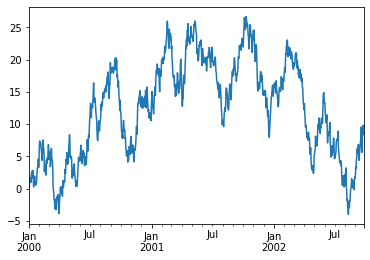

In [66]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

<Figure size 432x288 with 0 Axes>

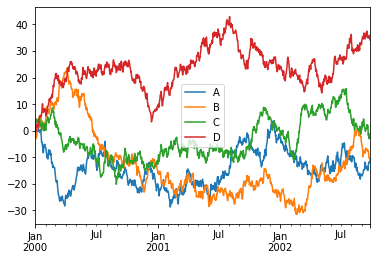

In [67]:
import matplotlib.pyplot as plt

pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
pdf = pdf.cumsum()
plt.figure(); pdf.plot(); plt.legend(loc='best')